# Лабораторная работа: декодирование DTMF сигнала
### Кодуков А. В. вариант 3


First pressed button:


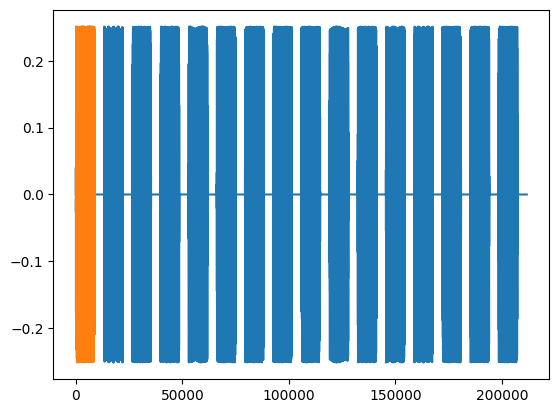

In [53]:
import librosa
from matplotlib import pyplot as plt

N = 44100
x, sr = librosa.load("DTMF_Lab3.wav", sr = 44100)
plt.show()

ms200 = int(N * 0.2)
signal_len = ms200
skip_len = int(ms200 / 2)

signals = []

print()
plt.plot(x)

# разбиение сигнала на части по 200мс
for i in range(int(len(x) / (signal_len + skip_len))):
    cur_step = (signal_len + skip_len) * i
    signals.append(x[cur_step:cur_step + signal_len])

plt.plot(signals[0])

print("First pressed button:")

plt.show()

In [54]:
import math
import numpy as np

# Расчет амплитуды для определенной частоты
def goertzel_power_sqr(x, freq, block_len):
    alpha = 2 * math.pi * freq / block_len
    w_real = math.cos(alpha)

    c = 2 * w_real
    y  = 0.0
    g1 = 0.0
    g2 = 0.0
    for n in range(block_len):
        y = x[n] + c * g1 - g2
        g2 = g1
        g1 = y

    power_k  = math.pow(g2, 2) + math.pow(g1, 2) - (c * g1 * g2)
    return power_k

used_freq = [697, 770, 852, 941, 1209, 1336, 1477, 1633]
spectral_indexes = [np.ceil(used_freq[i] / N * signal_len) for i in range(len(used_freq))]

# Применение алгоритма Герцеля для спектрального индекса каждой из частот и нахождение двух максимумов
result_pairs = []
for i in range(len(signals)):
    res = []
    for j in range(len(used_freq)):
        res.append(goertzel_power_sqr(signals[i], spectral_indexes[j], signal_len))
    print(res)
    first_max = np.argmax(res)
    res[first_max] = -1
    second_max = np.argmax(res)
    result_pairs.append(np.sort([used_freq[first_max], used_freq[second_max]]))

[78809.22618204867, 145.7209206401444, 27.444580814546498, 8.629338751114517, 0.2997940323850248, 17606.373209869373, 30.942716903579594, 4.166244331001806]
[78693.88752666, 136.5394505025347, 20.9089821991073, 3.823844249335451, 0.03410879614054341, 1.4829234859581513, 23.3653726312952, 174752.4925994263]
[78710.04146163864, 139.06002716128205, 23.25353994813537, 5.601738961815698, 0.089648227875059, 13.267516496010998, 78836.91775708587, 23.37059007196777]
[15.279077532024985, 302328.3173966706, 14.462337991209779, 10.054450401587928, 0.6372507907079736, 1.4694619375319267, 24.19489942420195, 174635.2813063482]
[15.61822114501092, 301978.99781871587, 22.96993053614051, 29.02872633542529, 264437.94450573623, 0.012563268142018896, 1.9753869877514063, 1.0821188124456818]
[9.075097371290866, 68.32902763679476, 78723.67965000076, 84.2835436245366, 0.1636268050708236, 1.818518856148561, 25.17507024596918, 174765.53399286303]
[15.504974421191037, 302113.2636734098, 18.766364168741347, 17.06

In [57]:
buttons = {
	np.array([697, 1209]).tobytes(): "1",
	np.array([697, 1336]).tobytes(): "2",
	np.array([697, 1477]).tobytes(): "3",
	np.array([697, 1633]).tobytes(): "A",
	np.array([770, 1209]).tobytes(): "4",
	np.array([770, 1336]).tobytes(): "5",
	np.array([770, 1477]).tobytes(): "6",
	np.array([770, 1633]).tobytes(): "B",
	np.array([852, 1209]).tobytes(): "7",
	np.array([852, 1336]).tobytes(): "8",
	np.array([852, 1477]).tobytes(): "9",
	np.array([852, 1633]).tobytes(): "C",
	np.array([941, 1209]).tobytes(): "*",
	np.array([941, 1336]).tobytes(): "0",
	np.array([941, 1477]).tobytes(): "#",
	np.array([941, 1633]).tobytes(): "D",
}

print("Ответ:")
for pair in result_pairs:
	print(buttons[np.array(pair).tobytes()], end=" ")

Ответ:
2 A 3 B 4 C 5 D 6 * 7 # 8 C 9 D 